# 1. Importing the Libraries and Uploading Dataset -->

## 1.1 Importing To Libraries -->

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

# 1.2 Importing To Dataset -->

In [62]:
dataset = pd.read_csv('/Users/mac/Desktop/DataScienceCalismalar/VBO/Hafta_1/Kural_Tabanli_Siniflandirma/Kural_Tabanli_Siniflandirma/persona.csv')
df = dataset.copy()

In [63]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


# 2. General Information About Dataset -->

In [66]:
def check_df(dataset, head = 5):
    print("############################### Information About Dataset ##################################")
    print(dataset.info())
    print("###############################    Shape  ##################################")
    print(dataset.shape)
    print("###############################    Types  ##################################")
    print(dataset.dtypes)
    print("###############################    Head   ##################################")
    print(dataset.head(head))
    print("###############################    Tail   ##################################")
    print(dataset.tail(head))
    print("################## Is There Any Null Value in Dataset ? ##################")
    print(dataset.isnull().sum())
    print("############################### Quantiles ##################################")
    print(dataset.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)

In [67]:
check_df(df)

############################### Information About Dataset ##################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB
None
###############################    Shape  ##################################
(5000, 5)
###############################    Types  ##################################
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
###############################    Head   ##################################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     b

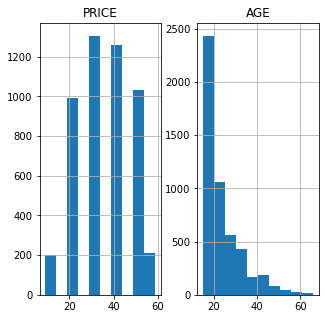

In [70]:
df.hist(figsize = (5,5))
plt.show()

# 3. Let's ask and answer the following questions to the dataset in order to have more control over the dataset -->

## 3.1 How many UNIQUE values are in the SOURCE variable? And what are their class frequencies? 

In [15]:
df.groupby('SOURCE')['SOURCE'].count()

SOURCE
android    2974
ios        2026
Name: SOURCE, dtype: int64

## 3.2 What is the change in PRICE values? How many sales were realized at each sales price? -->

In [16]:
df.groupby('PRICE')['PRICE'].count()

PRICE
9      200
19     992
29    1305
39    1260
49    1031
59     212
Name: PRICE, dtype: int64

## 3.3 How many sales from which country? -->

In [19]:
df.groupby('COUNTRY').agg({'PRICE': 'count'}).reset_index().sort_values(by = 'PRICE', ascending = False)

,COUNTRY,PRICE
5,usa,2065
0,bra,1496
2,deu,455
4,tur,451
3,fra,303
1,can,230


## 3.4 How much was earned in total from sales by country? -->

In [21]:
df.groupby('COUNTRY').agg({'PRICE': 'sum'}).reset_index().sort_values(by = 'PRICE', ascending = False)

,COUNTRY,PRICE
5,usa,70225
0,bra,51354
4,tur,15689
2,deu,15485
3,fra,10177
1,can,7730


## 3.5 What are the sales amount by SOURCE types? -->

In [23]:
df.groupby('SOURCE').agg({'PRICE': 'sum'}).reset_index().sort_values(by = 'PRICE', ascending = False)

,SOURCE,PRICE
0,android,101636
1,ios,69024


## 3.6 What are the PRICE averages by country? -->

In [26]:
df.groupby('COUNTRY').agg({'PRICE': 'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)

,COUNTRY,PRICE
4,tur,34.787140
0,bra,34.327540
2,deu,34.032967
5,usa,34.007264
1,can,33.608696
3,fra,33.587459


## 3.7 What are the PRICE averages by SOURCE? -->

In [27]:
df.groupby('SOURCE').agg({'PRICE': 'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)

,SOURCE,PRICE
0,android,34.174849
1,ios,34.069102


## 3.8 What are the PRICE averages in the COUNTRY - SOURCE? -->

In [31]:
df.groupby(['COUNTRY','SOURCE']).agg({'PRICE':'mean'})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

# 4. What are the average earnings by COUNTRY - SOURCE - SEX - AGE? -->

In [71]:
df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE' : 'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)[:10]

,COUNTRY,SOURCE,SEX,AGE,PRICE
47,bra,android,male,46,59.0
290,usa,android,male,36,59.0
167,fra,android,female,24,59.0
339,usa,ios,male,32,54.0
125,deu,android,female,36,49.0
129,deu,android,female,51,49.0
155,deu,ios,male,20,49.0
268,usa,android,female,47,49.0
191,fra,ios,male,20,49.0
347,usa,ios,male,59,46.5


In [36]:
agg_df = df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE' : 'mean'}).reset_index().sort_values(by = 'PRICE', ascending = False)

# 5. Now let's convert the Age variable into a categorical variable and convert this new version of the dataset to a new dataframe as agg_df -->

In [38]:
agg_df.loc[:, 'AGE_CAT'] = pd.cut(agg_df['AGE'], bins = [0,18,23,30,40,70], labels = ['0_18', '19_23', '24_30', '31_40', '41_70'])

In [39]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
47,bra,android,male,46,59.0,41_70
290,usa,android,male,36,59.0,31_40
167,fra,android,female,24,59.0,24_30
339,usa,ios,male,32,54.0,31_40
125,deu,android,female,36,49.0,31_40


# 6. Define level-based new customers (personas) and add them as variables to the dataset -- >

In [40]:
columns_list = ['COUNTRY', 'SOURCE', 'SEX', 'AGE_CAT']
agg_df.loc[:, 'CUSTOMERS_LEVEL_BASED'] = agg_df[columns_list].apply('_'.join, axis = 1).str.upper()

In [41]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,CUSTOMERS_LEVEL_BASED
47,bra,android,male,46,59.0,41_70,BRA_ANDROID_MALE_41_70
290,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
167,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
339,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
125,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [42]:
agg_df['CUSTOMERS_LEVEL_BASED'].value_counts()

BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_70      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
BRA_IOS_MALE_31_40          6
USA_ANDROID_FEMALE_24_30    6
USA_IOS_MALE_24_30          6
BRA_IOS_FEMALE_24_30        6
USA_ANDROID_MALE_31_40      6
BRA_ANDROID_FEMALE_31_40    6
USA_IOS_FEMALE_41_70        5
BRA_ANDROID_FEMALE_19_23    5
USA_ANDROID_FEMALE_31_40    5
TUR_IOS_FEMALE_19_23        5
BRA_IOS_MALE_41_70          5
BRA_ANDROID_MALE_19_23      5
USA_ANDROID_MALE_19_23      5
USA_ANDROID_FEMALE_19_23    5
DEU_ANDROID_MALE_31_40      5
BRA_IOS_FEMALE_31_40        5
USA_IOS_MALE_41_70          5
USA_ANDROID_FEMALE_41_70    5
USA_IOS_MALE_31_40          5
USA_IOS_FEMALE_19_23        5
DEU_IOS_FEMALE_0_18         4
USA_IOS_FEMALE_0_18         4
TUR_ANDROID_FEMALE_41_70    4
BRA_ANDROID_MALE_41_70      4
BRA_IOS_MALE_0_18           4
BRA_IOS_MALE_19_23          4
BRA_IOS_FEMALE_0_18         4
DEU_ANDROID_FEMALE_24_30    4
USA_ANDROI

In [43]:
agg_df = agg_df.groupby('CUSTOMERS_LEVEL_BASED').agg({'PRICE' : 'mean'})

In [44]:
agg_df

,PRICE
CUSTOMERS_LEVEL_BASED,
BRA_ANDROID_FEMALE_0_18,35.645303
BRA_ANDROID_FEMALE_19_23,34.077340
BRA_ANDROID_FEMALE_24_30,33.863946
BRA_ANDROID_FEMALE_31_40,34.898326
BRA_ANDROID_FEMALE_41_70,36.737179
BRA_ANDROID_MALE_0_18,34.805861
BRA_ANDROID_MALE_19_23,31.673243
BRA_ANDROID_MALE_24_30,33.413919
BRA_ANDROID_MALE_31_40,34.327381


# 7. We create a new variable called SEGMENT. -- >

In [45]:
agg_df.loc[:, 'SEGMENT'] = pd.qcut(agg_df['PRICE'], 4, labels = ['D', 'C', 'B', 'A'])

In [46]:
agg_df

,PRICE,SEGMENT
CUSTOMERS_LEVEL_BASED,,
BRA_ANDROID_FEMALE_0_18,35.645303,B
BRA_ANDROID_FEMALE_19_23,34.077340,C
BRA_ANDROID_FEMALE_24_30,33.863946,C
BRA_ANDROID_FEMALE_31_40,34.898326,B
BRA_ANDROID_FEMALE_41_70,36.737179,A
BRA_ANDROID_MALE_0_18,34.805861,B
BRA_ANDROID_MALE_19_23,31.673243,D
BRA_ANDROID_MALE_24_30,33.413919,C
BRA_ANDROID_MALE_31_40,34.327381,B


In [48]:
agg_df.groupby('SEGMENT').agg({"PRICE" : ['count', 'std', 'mean', 'min', 'max', 'sum']}).sort_values(by = 'SEGMENT', ascending = False)

PRICE                                                        
        count       std       mean        min        max          sum
SEGMENT                                                              
A          27  2.581762  38.691234  36.060606  45.428571  1044.663328
B          27  0.636502  34.999645  34.103727  36.000000   944.990411
C          27  0.492587  33.509674  32.500000  34.077340   904.761209
D          28  3.638037  29.206780  19.000000  32.333333   817.789833

# 8. Estimate how much revenue they can generate by creating new customers. -->

In [49]:
new_user_list = ['TUR_ANDROID_FEMALE_31_40',
                 'FRA_IOS_FEMALE_31_40',
                 'TUR_ANDROID_MALE_24_30']

In [59]:
for new_user in new_user_list:
    print(agg_df[agg_df['CUSTOMERS_LEVEL_BASED'] == new_user])
    print('\n*************************************************\n')

       CUSTOMERS_LEVEL_BASED      PRICE SEGMENT
72  TUR_ANDROID_FEMALE_31_40  41.833333       A

*************************************************

   CUSTOMERS_LEVEL_BASED      PRICE SEGMENT
63  FRA_IOS_FEMALE_31_40  32.818182       C

*************************************************

     CUSTOMERS_LEVEL_BASED      PRICE SEGMENT
76  TUR_ANDROID_MALE_24_30  39.439103       A

*************************************************

